In [1]:
from app.dataset.dataset import Dataset
from app.dataset.utils.dataset_splitter import SignerDatasetSplitter
from app.features.plotter.frames_plotter import plot_frames
from app.model.model_statistics import ModelStatistics
from app.model.svc_classifier import SVClassifier

import numpy as np

dataset = Dataset("data/WLASL_v0.3.json")
n_videos = 2000

In [2]:
videos = dataset.videos
len(videos)

11979

In [3]:
signers = [video.signer_id for video in videos]
len(signers)

11979

In [4]:
splitter = SignerDatasetSplitter(videos[:n_videos], frames_split=0.01)
train_frames, val_frames, test_frames = splitter.train_test_split(test_size=0.2, val_size=0.2, random_state=42)
augmented_train_frames = splitter.apply_data_augmentation(train_frames, num_augmentations=0)

In [5]:
print(len(train_frames))
print(len(augmented_train_frames))
print(len(val_frames))
print(len(test_frames))

1382
1382
346
433


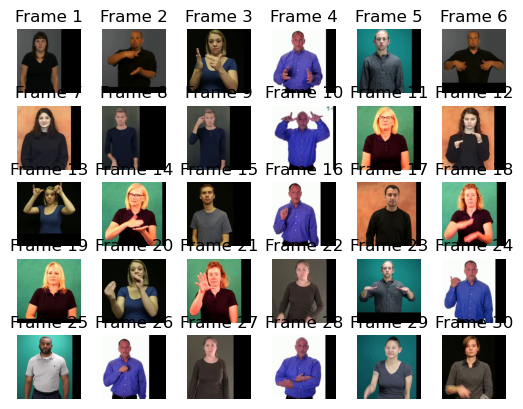

In [6]:
plot_frames([signer_frame.frame for signer_frame in augmented_train_frames[:30]])

In [7]:
X_train = [signer_frame.features for signer_frame in augmented_train_frames]
y_train = [signer_frame.signer_id for signer_frame in augmented_train_frames]
X_val = [signer_frame.features for signer_frame in val_frames]
y_val = [signer_frame.signer_id for signer_frame in val_frames]
X_test = [signer_frame.features for signer_frame in test_frames]
y_test = [signer_frame.signer_id for signer_frame in test_frames]

In [8]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

1382
1382
346
346
433
433


In [9]:
svc = SVClassifier()
svc.train(np.array(X_train), y_train)

Training SVM...
X_train shape: (1382, 27038)
Y_train shape: 1382
[LibSVM].*
optimization finished, #iter = 74
obj = -22.272028, rho = 0.418641
nSV = 49, nBSV = 15
.*
optimization finished, #iter = 46
obj = -5.554355, rho = -0.625712
nSV = 26, nBSV = 4
.*
optimization finished, #iter = 148
obj = -14.157499, rho = 0.615429
nSV = 93, nBSV = 1
.*
optimization finished, #iter = 82
obj = -13.138524, rho = 0.267685
nSV = 46, nBSV = 2
.*
optimization finished, #iter = 49
obj = -10.632975, rho = -0.276416
nSV = 32, nBSV = 8
.*
optimization finished, #iter = 150
obj = -11.001242, rho = 0.314779
nSV = 90, nBSV = 0
*
optimization finished, #iter = 191
obj = -11.836065, rho = 0.271203
nSV = 116, nBSV = 0
*
optimization finished, #iter = 136
obj = -10.340724, rho = 0.040469
nSV = 85, nBSV = 0
.*
optimization finished, #iter = 188
obj = -20.761551, rho = 0.578143
nSV = 110, nBSV = 10
.*
optimization finished, #iter = 50
obj = -13.949687, rho = -0.236885
nSV = 35, nBSV = 12
.*
optimization finished, #

In [10]:
y_pred = svc.predict(X_test, y_test)

Testing SVM...


In [11]:
stats = ModelStatistics(save_name=f"svc_{n_videos}_signer_test_{len(y_test)}", save_dir="signer/plots")

In [12]:
stats.print_accuracy(y_test, y_pred)

Accuracy: 69.98%


Confusion matrix saved at signer/plots/svc_2000_signer_test_433.png


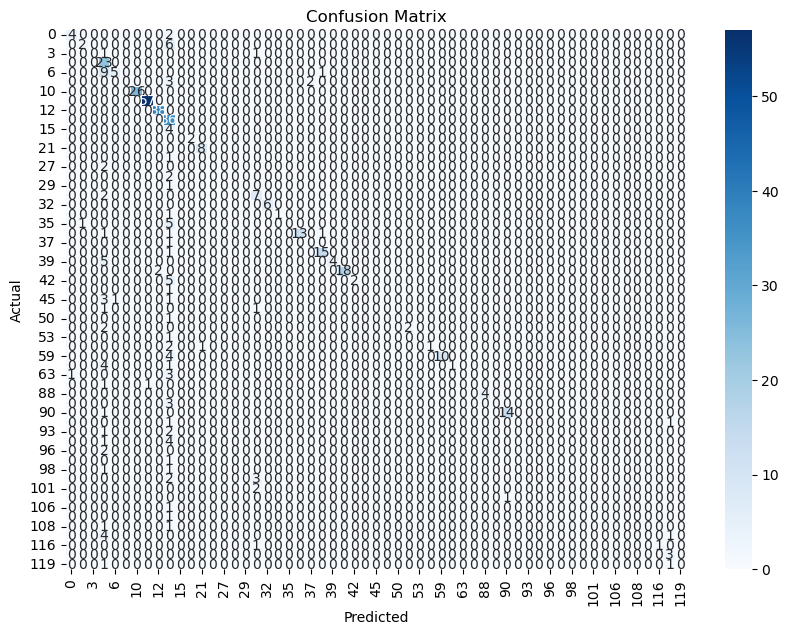

In [13]:
stats.plot_confusion_matrix(y_test, y_pred, save=True, plot=True)